In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('./listings.csv')
calendar = pd.read_csv('./calendar.csv')

<h2>Question 1: How have price and availablity changed over time, and what time of year has the highest price?</h2>

First I will take a look at the calendar data.

In [2]:
print(calendar.dtypes)
calendar.head()

listing_id     int64
date          object
available     object
price         object
dtype: object


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


Since I want to know how the price is changing over time, I will drop rows which do not display price. I could also impute the price, but because I will not be building a model for this question it is not necessary. Also, I want to graph the price, and I can see the price is dtype object, so I will convert to integer.

In [3]:
cdf = calendar.copy()
cdf.dropna(subset=['price'],inplace=True)
cdf['price'] = cdf['price'].map(lambda p: int(p[1:-3].replace(",", "")))
cdf.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65
366,3075044,2017-08-21,t,65
367,3075044,2017-08-20,t,65
368,3075044,2017-08-19,t,75
369,3075044,2017-08-18,t,75


Also need to convert the date to a datetime type for pretty graphing.

In [4]:
cdf['date'] = pd.to_datetime(cdf['date'])
print(cdf.dtypes)

listing_id             int64
date          datetime64[ns]
available             object
price                  int64
dtype: object


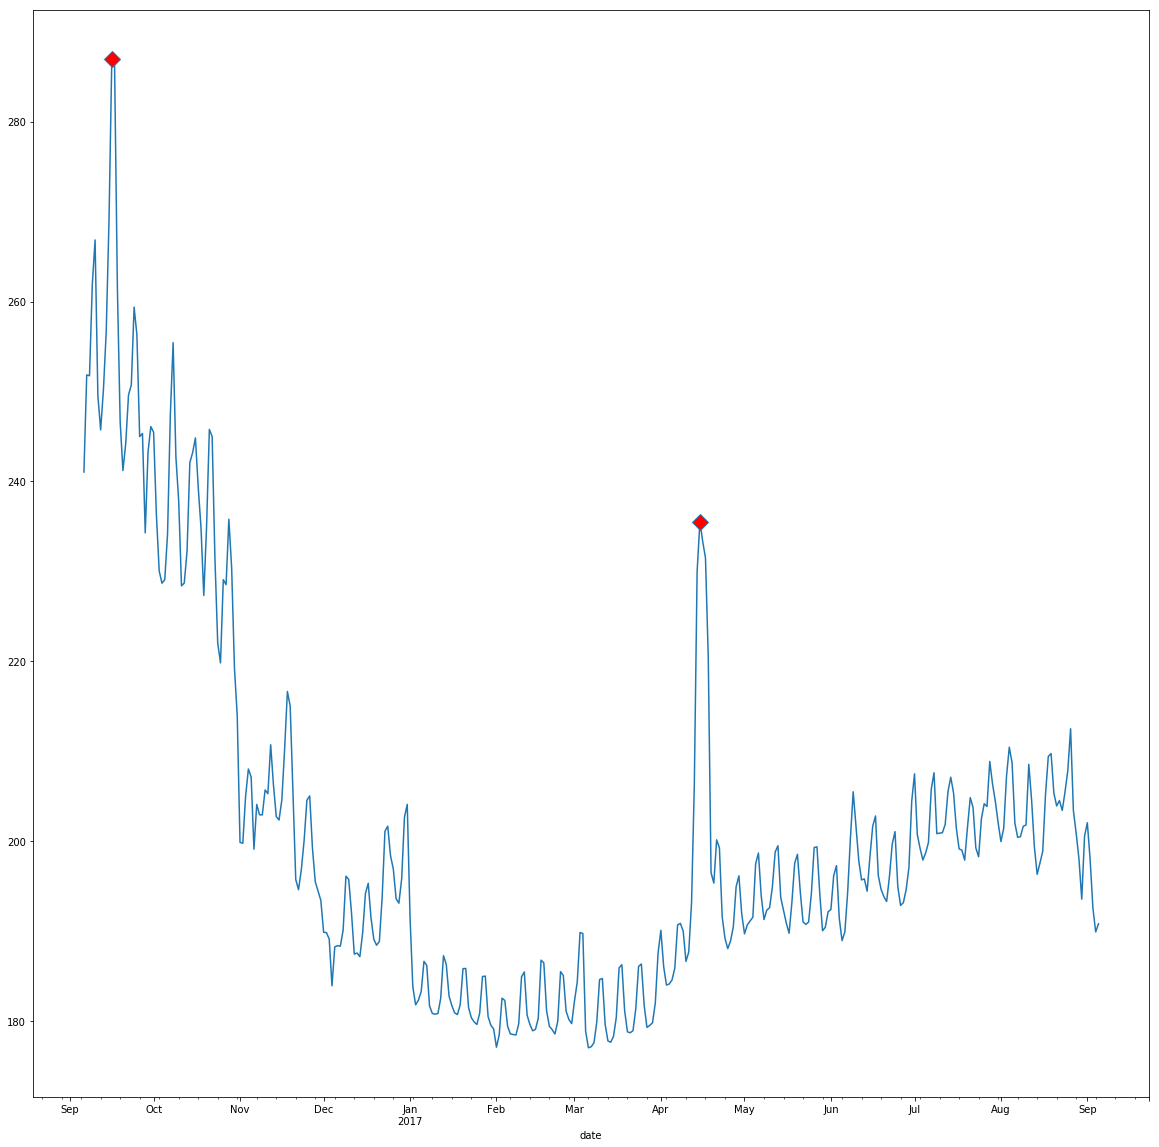

In [5]:
# Group data by date and take the mean of the price by date for graph
meanprice = cdf.groupby(['date'])['price'].mean()
meanprice.plot(figsize=(20,20), markevery=[10,221], marker="D", markersize=12, markerfacecolor='red');

From these results, we can see the Airbnb prices have come down a lot over the past year on average, however there was a large spike in mid April of 2017

In [6]:
# use index 116 as dividing point because it is last day of 2016
print(meanprice.index[116])

print("Mean price for 2016 data: " + str(meanprice[0:116].mean()))
print("Mean price for September 16th: " + str(meanprice[10].mean()))
print("Mean price for 2017 data: " + str(meanprice[117:].mean()))
print("Mean price for April 15th: " + str(meanprice[221].mean()))

2016-12-31 00:00:00
Mean price for 2016 data: 219.53959385064348
Mean price for September 16th: 286.9219765929779
Mean price for 2017 data: 192.55892696376452
Mean price for April 15th: 235.50161812297733


So comparing the last four months of 2016 to the first 8 months of 2017 we can see the price has on average reduced by almost $30.
Another interesting feature of the data is the large spikes in mean price mid-September of 2016 and mid-April of 2017. Let's take a look
at the availability feature to see if there is a corresponding trend.

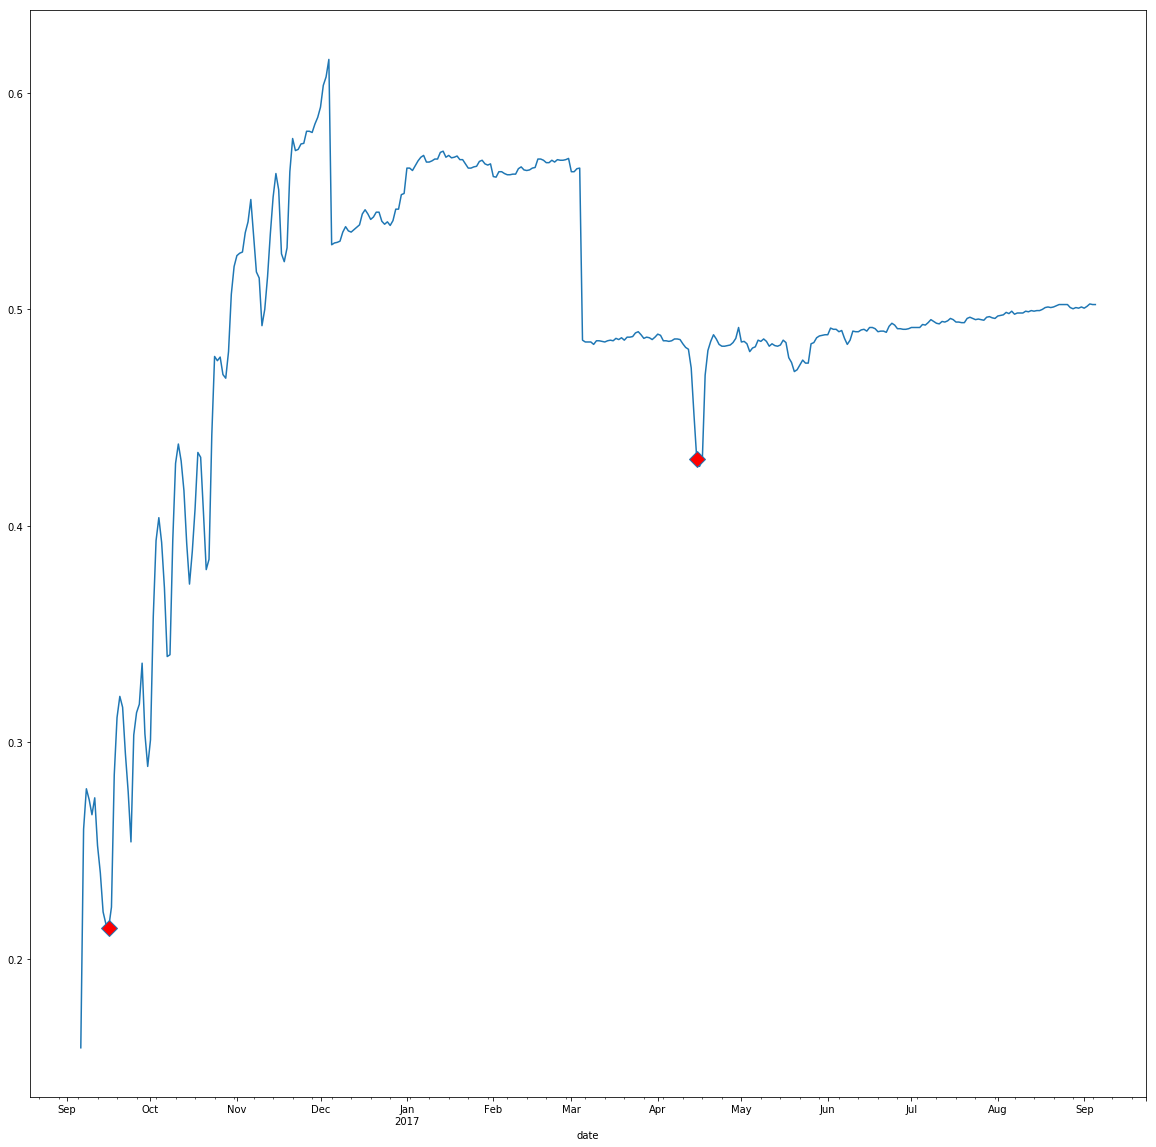

In [7]:
c2 = calendar.copy()
c2['available'] = c2['available'].replace("f",0)
c2['available'] = c2['available'].replace("t",1)
c2['date'] = pd.to_datetime(c2['date'])
meanavail = c2.groupby(['date'])['available'].mean()
meanavail.plot(figsize=(20,20), markevery=[10,221], marker="D", markersize=12, markerfacecolor='red');

What we can see from this graph is that the price and availablity are nearly inverses of each other. 
Beginning early March 2017, Airbnb was able to stabilize and increase the availability to around 0.5 ratio. Probabaly overall low availability contributed to the higher prices in 2016,  and the spike in price mid-April makes sense as well because there was a drop in availability during this time. 

The Boston marathon was on April 16th 2017, so this probably accounts for the increased prices and reduced availablity around that time. With only one year of data, we can't make any conclusive statements, but it seems around the time of the Boston marathon the prices will be the highest and the availablility will be the lowest.

<h2>Question 2: What are the differences between Boston neighborhoods in terms of price, availablility, and review ratings?</h2>

The listings dataset will help to answer these questions.
Firstly I need convert the price in integers, as I did with the calendar data.

In [8]:
ldf = listings.copy()
ldf['price'] = ldf['price'].map(lambda p: int(p[1:-3].replace(",", "")))

In [9]:
ldf.groupby(['neighbourhood_cleansed'])['price'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Mattapan,24.0,75.125000,33.171901,40.0,50.00,67.0,83.00,169.0
Hyde Park,31.0,86.548387,66.468458,31.0,50.00,58.0,86.50,269.0
Dorchester,269.0,91.639405,56.984681,25.0,59.00,72.0,105.00,395.0
Roslindale,56.0,98.428571,54.793449,40.0,60.00,76.5,116.25,285.0
West Roxbury,46.0,107.108696,67.772570,45.0,65.00,85.0,119.75,349.0
Allston,260.0,112.307692,79.980147,11.0,60.00,85.0,135.75,550.0
Brighton,185.0,118.767568,98.491254,29.0,65.00,90.0,140.00,999.0
East Boston,150.0,119.153333,66.080969,30.0,72.00,99.0,143.00,359.0
Mission Hill,124.0,121.967742,103.742641,20.0,65.00,89.5,160.00,872.0


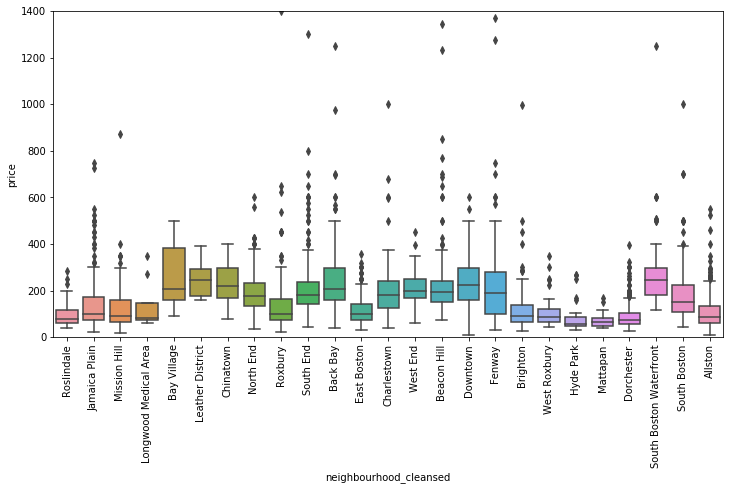

In [10]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price',  data = ldf)
xt = plt.ylim(0, 1400)
xt = plt.xticks(rotation=90)

In [11]:
ldf.groupby(['neighbourhood_cleansed'])['availability_365'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Mission Hill,124.0,130.145161,137.563803,0.0,0.00,55.0,283.00,365.0
Allston,260.0,131.896154,145.248026,0.0,0.00,64.0,280.25,365.0
Leather District,5.0,145.000000,198.557297,0.0,0.00,0.0,360.00,365.0
Fenway,290.0,149.527586,126.876616,0.0,20.75,148.0,248.00,365.0
South Boston Waterfront,83.0,161.168675,133.663285,0.0,29.50,117.0,305.50,365.0
Beacon Hill,194.0,163.675258,142.163894,0.0,6.25,141.5,308.75,365.0
North End,143.0,164.902098,142.399028,0.0,0.00,196.0,307.50,365.0
South End,326.0,165.861963,141.229380,0.0,16.25,142.5,314.75,365.0
Brighton,185.0,168.643243,147.387512,0.0,0.00,158.0,319.00,365.0


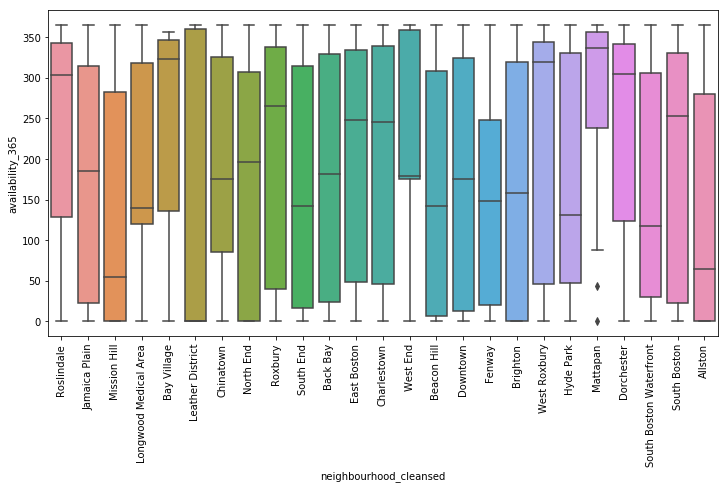

In [12]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'availability_365',  data = ldf)
xt = plt.xticks(rotation=90)

In [13]:
ldf.groupby(['neighbourhood_cleansed'])['review_scores_rating'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Mission Hill,82.0,87.695122,13.800777,20.0,83.25,92.0,96.00,100.0
Dorchester,225.0,89.280000,11.957395,20.0,87.00,93.0,97.00,100.0
Fenway,187.0,89.417112,11.880106,40.0,83.00,93.0,100.00,100.0
Roxbury,117.0,89.803419,8.980092,58.0,85.00,91.0,97.00,100.0
Allston,182.0,90.164835,13.304561,20.0,89.25,94.0,100.00,100.0
East Boston,136.0,90.272059,8.854768,47.0,86.00,92.0,97.00,100.0
West End,27.0,90.333333,9.503036,60.0,87.50,93.0,97.00,100.0
Brighton,133.0,90.864662,12.600975,20.0,89.00,94.0,98.00,100.0
Mattapan,18.0,91.000000,6.650962,80.0,87.00,90.5,95.75,100.0


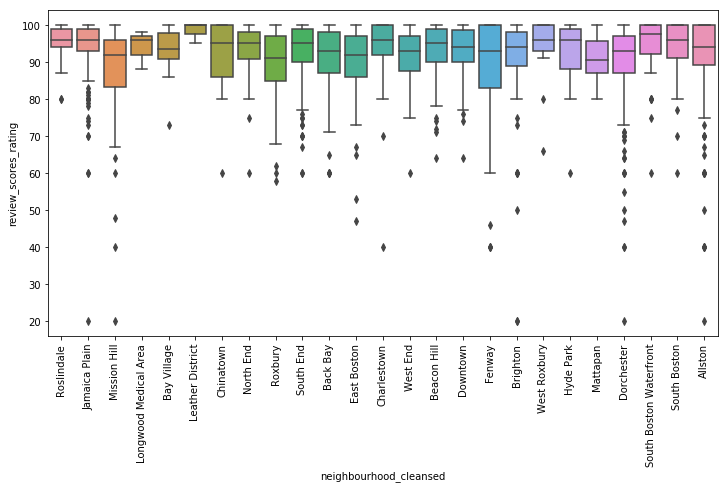

In [14]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'review_scores_rating',  data = ldf)
xt = plt.xticks(rotation=90)

<h2>Question 3:Predicting prices</h2>

In [18]:
dfmodel = listings.copy()
dfmodel['price'] = dfmodel['price'].map(lambda p: int(p[1:-3].replace(",", "")))
dfmodel.dropna(subset=['price'])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,f,NaN,NaN,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,9.0,f,NaN,NaN,f,strict,f,f,2,1.01


In [19]:
dfmodel = dfmodel.drop(['id','listing_url','scrape_id','last_scraped','name','description','experiences_offered','picture_url',
             'host_id','host_name','host_since','host_location','host_thumbnail_url','host_picture_url','street','neighbourhood',
             'neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country',
             'latitude','longitude','is_location_exact','square_feet','weekly_price','monthly_price','calendar_updated','has_availability',
             'calendar_last_scraped','first_review','last_review','requires_license','license','jurisdiction_names','host_listings_count'],axis=1)
modelcat = dfmodel.select_dtypes(include='object')
modelnum = dfmodel.select_dtypes(exclude='object')
y = modelnum['price']
X = modelnum[['accommodates','host_total_listings_count','number_of_reviews','review_scores_rating','guests_included',
              'bathrooms','bedrooms','beds','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_value']]
fill_mean = lambda col: col.fillna(col.mean())
X = X.apply(fill_mean, axis=0)

In [20]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.1849735413185445 on 1076 values.'

In [22]:
dfmodel = dfmodel[np.abs(dfmodel.price-dfmodel.price.mean()) <= (3*dfmodel.price.std())]

In [90]:
modelcat = dfmodel.select_dtypes(include='object')
modelnum = dfmodel.select_dtypes(exclude='object')
y = modelnum['price']
X = modelnum[['accommodates','host_total_listings_count','number_of_reviews','review_scores_rating','guests_included',
              'bathrooms','bedrooms','beds','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_value']]
fill_mean = lambda col: col.fillna(col.mean())
X = X.apply(fill_mean, axis=0)

In [91]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.40608190447187165 on 1066 values.'

In [92]:
possible_vals = ['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises',
       'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers', 'Heating',
       'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen',
       'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)',
       'Paid Parking Off Premises', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet', 'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50']
amenity = np.array([modelcat['amenities'].map(lambda amns: amn in amns) for amn in possible_vals])
amenity = amenity.T
amenitydf = pd.DataFrame(data=amenity, columns=possible_vals)

In [93]:
X = pd.concat([X.reset_index(drop=True), amenitydf.reset_index(drop=True)],axis=1)

In [94]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model with amenities added was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model with amenities added was 0.5148170817918404 on 1066 values.'

In [95]:
df = modelcat[['neighbourhood_cleansed','room_type', 'bed_type','host_is_superhost','require_guest_phone_verification','host_identity_verified']]
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
x = pd.concat([df.reset_index(drop=True),X.reset_index(drop=True)],axis=1)
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)


In [96]:
"The r-squared score for the model using additional categorical variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using additional categorical variables was 0.6323245694442863 on 1066 values.'